In [151]:
import tweepy
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
#pip install textblob 

In [3]:
from textblob import TextBlob

In [4]:
consumer_key = 'jYsRsHCYuf8mUXzEjjd39fhx0'
consumer_secret = 'H6seQ7M5ICNZeX4Diw52aDLbdNl5K7p4jJwFlDALCaPmMB3W9n'
access_token = '3008102786-LFDXiiPPgKdHwo8y4s5lKLuGrtnSw0Gf8JxaprL'
access_token_secret = 'jPVimZtPiescyyLyRlWAZQcCtLAGDnvHy8lThcWA03sJZ'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [6]:
api = tweepy.API(auth)

In [7]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smhatr6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\smhatr6\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\smhatr6\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [13]:
# Open/create a file to append data to
import csv
csvFile = open('result.txt', 'w', encoding="utf-8")

#Use csv writer
csvWriter = csv.writer(csvFile)

# Write header row (feature column names of your choice)
csvWriter.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'location', 
                    'followers_count', 'retweet_count', 'favorite_count'])

# For each tweet matching hashtag, write relevant info to the csv
for tweet in tweepy.Cursor(api.search_tweets,
                           q = "UkraineRussiaWar",
                           lang = "en").items():

    # Write a row to the CSV file using encode UTF-8
    csvWriter.writerow([tweet.created_at, 
                        tweet.text.replace('\n',' ').encode('utf-8'), 
                        tweet.user.screen_name.encode('utf-8'), 
                        [e['text'] for e in tweet._json['entities']['hashtags']],  
                        tweet.user.location, 
                        tweet.user.followers_count, 
                        tweet.retweet_count, 
                        tweet.favorite_count])
    print(tweet.created_at, tweet.text)
csvFile.close()


2022-03-06 19:38:15+00:00 Spread info RETWEET not just LIKE  #Ukraine #Russia #UkraineRussiaWar https://t.co/4wF2dkoq8B
2022-03-06 19:38:14+00:00 It is reported that a russian fighter has just been destroyed near Kharkiv by ukrain's air defense.… https://t.co/1Ea2hk8smt
2022-03-06 19:38:14+00:00 RT @UkraineNewsUK: In Kyiv a woman knocked down a Russian drone from a balcony with a jar of cucumbers. How did they expect to occupy this…
2022-03-06 19:38:13+00:00 RT @Militarylandnet: 📷 Russian BMP-3 captured by Ukrainian forces, location unknown #Ukraine #UkraineRussiaWar https://t.co/9SYycNqiIP
2022-03-06 19:38:13+00:00 RT @IndyMan2020: Ukraine has flooded the northern part of Kyiv to prevent Russian advances, Smart! #rasputitsa 
#kyiv #ukraine #war #stopwa…
2022-03-06 19:38:13+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:38:12+00:00 RT @AfricaUnitNow: Yes, this is Moscow

2022-03-06 19:37:22+00:00 RT @UkraineNewsUK: In Kyiv a woman knocked down a Russian drone from a balcony with a jar of cucumbers. How did they expect to occupy this…
2022-03-06 19:37:22+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:37:21+00:00 RT @safaperaje: #Israeli forces shot and killed three #Palestinians, all under the age of 22, in the occupied West Bank, during the past 24…
2022-03-06 19:37:21+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:37:19+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:37:18+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:37:16+00:00 RT 

2022-03-06 19:36:02+00:00 RT @bbclysedoucet: Anastasiia’s story. “She was so strong. And she was never prouder to be Ukrainian.” #UkraineRussiaWar
2022-03-06 19:36:02+00:00 RT @truth_about_war: Serving Happy Meals in Russia while children in Ukraine are being killed? 
Don’t turn McDonald’s into McViolence!
#Ukr…
2022-03-06 19:36:00+00:00 RT @Militarylandnet: 📽️ Ukrainian forces destroyed Russian artillery battery near #Mykolaiv #Ukraine #UkraineRussiaWar https://t.co/oTppNmE…
2022-03-06 19:36:00+00:00 RT @Militarylandnet: 📷 Russian troops in #Enerhodar #Ukraine #UkraineRussiaWar https://t.co/a7LjNOnnyw
2022-03-06 19:35:58+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:35:55+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:35:52+00:00 RT @Militarylandnet: 📷 Photos of the jet wreckage. It was Su-34, num

2022-03-06 19:34:44+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:34:44+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:34:41+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:34:41+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:34:41+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:34:40+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-

2022-03-06 19:33:24+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:33:24+00:00 RT @BhavikaKapoor5: #UkraineRussiaWar has exposed double standard of the entire world.
2022-03-06 19:33:24+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:33:18+00:00 RT @Militarylandnet: 📷Just to sum it up, this was RF-13017, most likely Mi-35M of Russian AirForce. Shot down today near Mykolaiv today. #U…
2022-03-06 19:33:17+00:00 RT @SinitarGaming: Basically.
#Ukraine #UkraineRussianWar #UkraineRussiaWar #UkraineUnderAttack #Zelenskyy #ZelenskyyIsAHero https://t.co/O…
2022-03-06 19:33:17+00:00 #Breaking: Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cel… https://t.co/FRx1G0BJJd
2022-03-06 19:33:16+00:00 RT @kfaisal6101: This actually made me tear up. 
This picture is

2022-03-06 19:32:07+00:00 RT @km__Asif: This cartoon is so telling :)

Wow Modi Ji.

#UkraineRussiaWar #UkraineWar #IndiansInUkraine #IndianStudents https://t.co/BSa…
2022-03-06 19:32:06+00:00 RT @bbclysedoucet: Anastasiia’s story. “She was so strong. And she was never prouder to be Ukrainian.” #UkraineRussiaWar
2022-03-06 19:32:06+00:00 Occupation of #Ukraine️ 

#news #information #InformationWarfare #UkraineRussianWar #UkraineRussiaWar #UkraineWar… https://t.co/FaHIe57IHd
2022-03-06 19:32:04+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:32:03+00:00 RT @c_kensche: Israel mediates for peace in Europe. Who could have imagined this two weeks ago? The world is upside down. Let's hope that a…
2022-03-06 19:32:03+00:00 RT @Militarylandnet: 📽️ Destroyed Russian tank by Ukrainian 81st Airmobile Brigade near #Izium #Ukraine #UkraineRussiaWar https://t.co/23bZ…
2022-03-06 19:32:00+

2022-03-06 19:30:59+00:00 RT @VijayAza_10: @ZelenskyyUa Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/8L8e2AnuAG
2022-03-06 19:30:59+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:30:55+00:00 RT @Militarylandnet: 📷🇬🇧Former British Marines arrived to help fight alongside Ukrainian Forces, via @LucasFoxNews #Ukraine #UkraineRussiaW…
2022-03-06 19:30:55+00:00 RT @BradfordDemsFL: Why does it take a #UkraineRussiaWar to remind us that 1) The most ferocious defenders of #Democracy are those denied i…
2022-03-06 19:30:54+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:30:53+00:00 RT @Militarylandnet: 📽️ Another video of the destroyed Russian artillery battery near #Mykolaiv #Ukraine #UkraineRussiaWar https://t.co/5Ok…
2022-03-06 19:30:48+00:00 RT @Militarylandne

2022-03-06 19:29:51+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:29:51+00:00 RT @sevslv: The anti-war demonstration at The Bolshoi, Moscow today

#Againstwar
#UkraineUnderAttaсk
#UkraineRussiaWar
#RussiaUkraineWar

h…
2022-03-06 19:29:50+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:29:49+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:29:48+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:29:48+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:29:47+00:00 a room self contain in mi

2022-03-06 19:28:54+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:28:51+00:00 @IAPonomarenko Ukraine 🇺🇦 is the land of the  #FREEANDTHEBRAVE! Let’s get this trending! #Ukraine #UkraineRussiaWar… https://t.co/bqUeK33bK6
2022-03-06 19:28:50+00:00 One more. In five days russians will be fighting from bicycles 😂 #UkraineWar #UkraineRussianWar #UkraineConflict… https://t.co/DcmcgW5nRi
2022-03-06 19:28:48+00:00 RT @xx0XantiX0xx: Corruption of Zelensky Documentary part 3 https://t.co/MCwMGGxSAe 

#UkraineUnderAttaсk #Ukraine #UkraineRussiaWar #Russi…
2022-03-06 19:28:48+00:00 #Russians attack residential buildings in #Ukraine with bombs. Some of them didn't explode. However, why do civilia… https://t.co/OuKcHvTIli
2022-03-06 19:28:47+00:00 RT @War_Mapper: #BREAKING Map of the approximate situation in Ukraine as of 19:00 UTC 06/03/22. 

#UkraineCrisis #UkraineUnderAttack #Kyiv

2022-03-06 19:27:46+00:00 RT @VijayAza_10: @ZelenskyyUa Proud of fellow Sikhs in the Polish capital, Warsaw where the #Gurudwara has opened doors to anyone arriving…
2022-03-06 19:27:43+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:27:42+00:00 @McDonalds Serving Happy Meals in russia while children in Ukraine are being killed? 
#UkraineRussiaWar
2022-03-06 19:27:41+00:00 RT @UkraineNewsUK: Former Canadian elite sniper nicknamed "Wali" arrived in Ukraine on Wednesday to fight alongside Ukrainian forces. 🇺🇦
#S…
2022-03-06 19:27:40+00:00 RT @BombshellDAILY: ZELENSKY SURVIVES THIRD ASSASSINATION ATTEMPT
Inspirational leader symbolically defeats the worlds largest active Milit…
2022-03-06 19:27:39+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:27:39+00:00 RT @KyivPost: In Kazakhst

2022-03-06 19:26:34+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:26:33+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:26:32+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:26:30+00:00 RT @techz_dave: Pres. Zelensky is valiantly leading a country through war AND brings his own chair to a press conference. 

#Ukriane #Ukrai…
2022-03-06 19:26:29+00:00 RT @truth_about_war: Serving Happy Meals in Russia while children in Ukraine are being killed? 
Don’t turn McDonald’s into McViolence!
#Ukr…
2022-03-06 19:26:29+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:26:

2022-03-06 19:25:21+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:25:21+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:25:20+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:25:20+00:00 RT @bbclysedoucet: When you worry about oil prices rising, think sunflower oil too - #Ukraine provides 80-85% of it..not to mention wheat..…
2022-03-06 19:25:19+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:25:17+00:00 RT @BlackAlphaNetw1: The ONLY war WE care about...

Is the #AntiBlack race war.

Our ONLY focus is #Reparations 

Everything else =

2022-03-06 19:24:16+00:00 RT @truth_about_war: Serving Happy Meals in Russia while children in Ukraine are being killed? 
Don’t turn McDonald’s into McViolence!
#Ukr…
2022-03-06 19:24:15+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:24:14+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:24:14+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:24:12+00:00 RT @Militarylandnet: 📽️ Another video of the destroyed Russian artillery battery near #Mykolaiv #Ukraine #UkraineRussiaWar https://t.co/5Ok…
2022-03-06 19:24:07+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:24:

2022-03-06 19:22:54+00:00 RT @VijayAza_10: @ZelenskyyUa Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/8L8e2AnuAG
2022-03-06 19:22:51+00:00 RT @AfricaUnitNow: #UkraineRussiaWar The surrendered Russian soldier during the attack on Mykolayiv: “I am sorry that we invaded… The Russi…
2022-03-06 19:22:51+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:22:50+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:22:49+00:00 RT @Militarylandnet: 📽️ Another video of the destroyed Russian artillery battery near #Mykolaiv #Ukraine #UkraineRussiaWar https://t.co/5Ok…
2022-03-06 19:22:49+00:00 @unusual_whales Ukraine 🇺🇦 is the land of the  #FREEANDTHEBRAVE! Let’s get this trending! #Ukraine… https://t.co/I2VaGwCAPB
2022-03-06 19:22:49+00:00 RT @KyivPost: 22

2022-03-06 19:21:46+00:00 RT @aloksandal: Former Canadian elite sniper nicknamed "Wali" arrived in Ukraine on Wednesday to fight alongside Ukrainian forces. 🇺🇦
#Stan…
2022-03-06 19:21:46+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:21:45+00:00 RT @UA_struggle: Belarusians who are already fighting on the Ukrainian side against the Russian army call on their compatriots to help Ukra…
2022-03-06 19:21:42+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:21:40+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:21:39+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19

2022-03-06 19:20:25+00:00 RT @Ankita20200: Proud of fellow Sikhs in the Polish capital, Warsaw where the Gurudwara has opened doors to anyone arriving from #UkraineC…
2022-03-06 19:20:23+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:20:23+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:20:22+00:00 RT @petition: Former Elliott investor says "no way" when it comes to investing in Russian sovereign debt. 

https://t.co/30AJTo6qHc
2022-03-06 19:20:22+00:00 Russian President #VladimirPutin warned that #Ukraine statehood is in jeopardy and likened the West's #sanctions on… https://t.co/ccyUiV8if9
2022-03-06 19:20:21+00:00 RT @UkraineNewsUK: Former Canadian elite sniper nicknamed "Wali" arrived in Ukraine on Wednesday to fight alongside Ukrainian forces. 🇺🇦
#S…
2022-03-06 19:20:20+00

2022-03-06 19:19:20+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:19:19+00:00 RT @MariscottiA: This is the result ... congratulations #PutinHitler . Why don't you put it on TV for your propaganda? #StopPutinNOW #Ukrai…
2022-03-06 19:19:18+00:00 RT @InvestorHumbl: Local fishermen of #Mariupole are giving away their catch to civilians for free ✊🇺🇦 #Ukraine #StopRussia #Україна #Росси…
2022-03-06 19:19:18+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:19:16+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:19:15+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZ

2022-03-06 19:18:18+00:00 RT @Danwhite1972: “I'm fed up to the ears with old men dreaming up wars for young men to die in.”

George McGovern

#UkraineUnderAttaсk #Uk…
2022-03-06 19:18:18+00:00 RT @UkraineNewsUK: President Zelensky addresses Europeans in Prague live! 🇺🇦

Almost all of #Prague citizens came out in support of #Ukrain…
2022-03-06 19:18:17+00:00 RT @xx0XantiX0xx: Corruption of Zelensky Documentary part 3 https://t.co/MCwMGGxSAe 

#UkraineUnderAttaсk #Ukraine #UkraineRussiaWar #Russi…
2022-03-06 19:18:17+00:00 RT @War_Mapper: #BREAKING Map of the approximate situation in Ukraine as of 19:00 UTC 06/03/22. 

#UkraineCrisis #UkraineUnderAttack #Kyiv…
2022-03-06 19:18:15+00:00 RT @xx0XantiX0xx: Corruption of Zelensky Documentary part 3 https://t.co/MCwMGGxSAe 

#UkraineUnderAttaсk #Ukraine #UkraineRussiaWar #Russi…
2022-03-06 19:18:13+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…

2022-03-06 19:17:17+00:00 RT @Ankita20200: Proud of fellow Sikhs in the Polish capital, Warsaw where the Gurudwara has opened doors to anyone arriving from #UkraineC…
2022-03-06 19:17:17+00:00 RT @MichaelvanMind: Remember this...

Zelensky knew Trump was nuts and in Putins pocket.

#Trump #Zelenskiy #Ukraine️ #UkraineRussiaWar htt…
2022-03-06 19:17:17+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:17:17+00:00 🚨🚨FOLLOW US LIVE THE LAST HOUR  #KyivNow 🚨🚨

🚨🚨 WITH IMAGES FROM #PolandBorder, #pripyat, #kyiv, #Sumi or #Lyiv 🚨🚨… https://t.co/NsYVhYHX1z
2022-03-06 19:17:16+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:17:14+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &am

2022-03-06 19:16:39+00:00 RT @Safeukraine1: $SFU token has continued her impressive performance 
Help #Ukrainians and #safeUkraine in the #UkraineRussiaWar and make…
2022-03-06 19:16:39+00:00 RT @ThakorPrakash: Ukraine's president Volodymyr #Zelenskiy rejected  The State's offer to evacuate  him from kyiv he said "i might be kill…
2022-03-06 19:16:39+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:16:39+00:00 RT @ThePakDaily: National anthem of Ukraine️ played in the Independence Square in #Kyiv.
#RussianUkrainianWar #RussiaUkraine #Russia #Russi…
2022-03-06 19:16:38+00:00 RT @xx0XantiX0xx: Corruption of Zelensky Documentary part 3 https://t.co/MCwMGGxSAe 

#UkraineUnderAttaсk #Ukraine #UkraineRussiaWar #Russi…
2022-03-06 19:16:37+00:00 RT @bbclysedoucet: Anastasiia’s story. “She was so strong. And she was never prouder to be Ukrainian.” #UkraineRussiaWar
2022-03-06 19:16:36+00:00 RT @KyivPost

2022-03-06 19:15:41+00:00 RT @tpyxaTV: ⚡️ Video of the aftermath from Russian bombing in #Kharkiv 

#Ukraine #Ukrainerussiawar #Russia #Putin #StandWithUkraine #puti…
2022-03-06 19:15:40+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:15:39+00:00 RT @GaryBro03036010: Russia has attacked schools and hospitals...
#RussiaUkraine #UkraineUnderAttack #Ukrainian #UkraineRussiaWar #Ukraine️…
2022-03-06 19:15:39+00:00 RT @UkraineNewsUK: In Kyiv a woman knocked down a Russian drone from a balcony with a jar of cucumbers. How did they expect to occupy this…
2022-03-06 19:15:37+00:00 RT @War_Mapper: #BREAKING Map of the approximate situation in Ukraine as of 19:00 UTC 06/03/22. 

#UkraineCrisis #UkraineUnderAttack #Kyiv…
2022-03-06 19:15:34+00:00 RT @Sanu16855007: So they say Putin hates this. Let's give it a go #GoFuckYourselfPutin

#Ukraine #UkraineRussiaWar #PutinHitler #PutinIs

2022-03-06 19:14:54+00:00 Tram depot in #Kharkiv was destroyed by Russians. Was that "military infrastructure"? Never seen armoured trams bef… https://t.co/MH29rPxVuZ
2022-03-06 19:14:54+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:14:53+00:00 RT @Tavia32600395: Civil Ukrainian family - father, mother and 2 children. They wanted to leave occupied Irpin that become a Hell on the Ea…
2022-03-06 19:14:52+00:00 Corruption of Zelensky Documentary part 3 https://t.co/MCwMGGxSAe 

#UkraineUnderAttaсk #Ukraine #UkraineRussiaWar… https://t.co/tuMYkCD7qE
2022-03-06 19:14:52+00:00 RT @KyivPost: 22 000 volunteers from 52 countries all over the world want to protect Ukraine in the #UkraineRussiaWar. https://t.co/gmZPmr4…
2022-03-06 19:14:48+00:00 RT @ndtv: #LeftRightCentre | "Russia is not going to have an easy time...nobody can prepare for this kind of economic isolation": Anuradha…


2022-03-06 19:13:57+00:00 RT @KyivPost: Today, in the field conditions of #UkraineRussiaWar, two fighters of the 112 brigade of the territorial defense, Lesya and Va…
2022-03-06 19:13:57+00:00 RT @fahmyalsaeid: A video is currently being circulated by former President "Trump" when the announcer of the program interrupted him and s…
2022-03-06 19:13:56+00:00 RT @velarith: Needs to be said.

 #Putin #Zelenskyy #Ukraine #Russia #UkraineRussiaWar #news #politics https://t.co/7p0Pu1UkPP
2022-03-06 19:13:55+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:13:50+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:13:50+00:00 RT @MichaelvanMind: Remember this...

Zelensky knew Trump was nuts and in Putins pocket.

#Trump #Zelenskiy #Ukraine️ #UkraineRussiaWar htt…
2022-03-06 19:13:49+00:00 R

2022-03-06 19:12:41+00:00 Ukraine Truly Brave &amp; Strong💪🇺🇦💙💛💙💛#Ukraine️ #Strong #DefendUkraine #StopPutinNOW #StopRussianAggression… https://t.co/tpl1vUXFwC
2022-03-06 19:12:41+00:00 RT @BombshellDAILY: ZELENSKY SURVIVES THIRD ASSASSINATION ATTEMPT
Inspirational leader symbolically defeats the worlds largest active Milit…
2022-03-06 19:12:40+00:00 RT @khalediskef: A video shows a Kaliber cruise missile probably targeting a #Ukrainian military airbase today 
 #Ukraine #Russia #Russia_U…
2022-03-06 19:12:39+00:00 RT @RUMAANSHAIKH: #Zelenskiy #StopPutinNOW #StandWithUkraine️ #UkraineRussianWar Who left the Russian market.     #UkraineRussiaWar #PutinW…
2022-03-06 19:12:39+00:00 Russia is essentially fighting NATO in Ukraine. #RussianUkrainianWar #Russia #RussiaUkraineConflict… https://t.co/XqNfL9f1Qf
2022-03-06 19:12:37+00:00 RT @VijayAza_10: @ZelenskyyUa Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/8L8e2AnuAG
2022-03-06 19:12:36+00:00 RT 

2022-03-06 19:11:43+00:00 RT @ndtv: #LeftRightCentre | "There was no on ground work by the Indian embassy when it came to providing food and water. We are surviving…
2022-03-06 19:11:43+00:00 RT @log4j_0day: Eduard Limonov, a Russian writer,  a supporter of Greater Serbian politics, in 1992, accompanied by Bosnian Serb leader Rad…
2022-03-06 19:11:42+00:00 RT @VijayAza_10: @ZelenskyyUa Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/8L8e2AnuAG
2022-03-06 19:11:41+00:00 RT @ALT_DOJ: All the companies that are leaving Russia need to be leaving Belarus as well! #UkraineRussiaWar #UkraineUnderAttaсk #RussianUk…
2022-03-06 19:11:40+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:11:40+00:00 RT @khalediskef: The explosion of an anonymous object in #Kharkov’s sky
#Russia_Ukraine #Russia #Ukraine #RussiaUkraine  #RussianUkrainianW…
202

2022-03-06 19:10:44+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:10:44+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:10:41+00:00 RT @Ukraine_News_22: A beautiful Cafe in Odessa, Ukraine 🇺🇦
#Ukraine️ #UkraineRussiaWar https://t.co/z3ARPqJSB2
2022-03-06 19:10:40+00:00 RT @MZsilinszki: Tweet of the day. (For me.)
#UkraineRussiaWar #Ukraine #Russia #EuropeanUnion 
⬇️⬇️⬇️⬇️⬇️⬇️⬇️
2022-03-06 19:10:39+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:10:38+00:00 RT @STWuk: There are 40+ No to War in #Ukraine protests listed across the UK today!

Find your local protest here: https://t.co/R45qqoByqh…
2022-03-06 19:10:38+00:00 RT @KyivPost: During

2022-03-06 19:09:30+00:00 RT @ParliamentPolly: Brotherly Love Prevails Amid Ongoing Crisis in Ukraine. More than 5,000 #JehovahsWitnesses publishers have fled their…
2022-03-06 19:09:30+00:00 RT @gbazov: #IMPORTANT—#THREAD—Staged #FalseFlag by #Ukraine|ian forces in #Irpen in an attempt to fabricate evidence of #Russia|n forces a…
2022-03-06 19:09:29+00:00 RT @Militarylandnet: 📽️ Ukrainian air-defense working in #Kharkiv, downed Russian plane #Ukraine #UkraineRussiaWar https://t.co/9JIFXZTXji
2022-03-06 19:09:27+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:09:27+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:09:26+00:00 RT @UkraineNewsUK: This is Kherson today. The city is under the control of Russians, but the inhabitants do not give up.

#StandWithUkrain…
2022-03-06 19:09:25+00:00 RT @UkraineWar

2022-03-06 19:08:17+00:00 RT @Militarylandnet: 📽️ Another video of the destroyed Russian artillery battery near #Mykolaiv #Ukraine #UkraineRussiaWar https://t.co/5Ok…
2022-03-06 19:08:17+00:00 Self contained for rent #NATO #Batman #Endsars #UFC272 #benin #PHtwittercommunity #UkraineRussiaWar #portharcourt… https://t.co/xk8z8V9XIg
2022-03-06 19:08:17+00:00 RT @UA_struggle: Belarusians who are already fighting on the Ukrainian side against the Russian army call on their compatriots to help Ukra…
2022-03-06 19:08:16+00:00 RT @MichaelvanMind: Remember this...

Zelensky knew Trump was nuts and in Putins pocket.

#Trump #Zelenskiy #Ukraine️ #UkraineRussiaWar htt…
2022-03-06 19:08:15+00:00 RT @gbazov: #IMPORTANT—#THREAD—Staged #FalseFlag by #Ukraine|ian forces in #Irpen in an attempt to fabricate evidence of #Russia|n forces a…
2022-03-06 19:08:13+00:00 How is the #UkraineRussiaWar being covered in Chinese media? #China #ChinaTaiwan  #StandWithUkraine️
2022-03-06 19:08:12+00:00 RT @AfricaUnit

2022-03-06 19:07:15+00:00 Another fact that’s quietly ignored is that hard Men like Putin and Kim Jong On don’t believe in diplomacy anymore… https://t.co/OVRnsBW1N8
2022-03-06 19:07:13+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:07:09+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:07:07+00:00 RT @Militarylandnet: 📽️ Another video of the destroyed Russian artillery battery near #Mykolaiv #Ukraine #UkraineRussiaWar https://t.co/5Ok…
2022-03-06 19:07:07+00:00 RT @MichaelvanMind: Remember this...

Zelensky knew Trump was nuts and in Putins pocket.

#Trump #Zelenskiy #Ukraine️ #UkraineRussiaWar htt…
2022-03-06 19:07:06+00:00 #Palestinian children being detained and terrorized by Israeli occupation forces but who cares! They are not white,… https://t.co/z3YgchPFPW
2022-03-06 19:

2022-03-06 19:06:07+00:00 RT @Militarylandnet: 📽️ Another video of the destroyed Russian artillery battery near #Mykolaiv #Ukraine #UkraineRussiaWar https://t.co/5Ok…
2022-03-06 19:06:06+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:06:04+00:00 RT @gbazov: #IMPORTANT—#THREAD—Staged #FalseFlag by #Ukraine|ian forces in #Irpen in an attempt to fabricate evidence of #Russia|n forces a…
2022-03-06 19:06:04+00:00 RT @InfoGeek17: A special unit of the Ukrainian police destroys a Russian tank #Ukraine️ #UkraineUnderAttack #UkraineRussiaWar https://t.co…
2022-03-06 19:06:01+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:06:01+00:00 RT @InfoGeek17: A special unit of the Ukrainian police destroys a Russian tank #Ukraine️ #UkraineUnderAttack #UkraineRussiaWar https://t.co…
2022-03-06 19

2022-03-06 19:05:13+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:05:12+00:00 Ukraine has surrendered its nuclear weapons to Russia, for which it has received territorial guarantees from Great… https://t.co/UNfVs912r6
2022-03-06 19:05:11+00:00 RT @gbazov: #FLASH—Negotiations between #Russia and #Ukraine will be held tomorrow in #Belarus. #SitRep from @colonelcassad, March 6, 2022.…
2022-03-06 19:05:11+00:00 Ambrose Kfe "scarred verse"
https://t.co/ZoGkSydAAp #music #ambrosekfe #bars #reallyrics #TheBatman… https://t.co/VeWTn4xsvp
2022-03-06 19:05:10+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:05:10+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:05:10+00:00 

2022-03-06 19:04:26+00:00 RT @boomlive_in: BOOM found that the viral video shows @JM_Scindia in a heated exchange with Mihai Anghel, the mayor of Snagov in #Romania.…
2022-03-06 19:04:26+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:04:25+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:04:25+00:00 RT @MichaelvanMind: Remember this...

Zelensky knew Trump was nuts and in Putins pocket.

#Trump #Zelenskiy #Ukraine️ #UkraineRussiaWar htt…
2022-03-06 19:04:23+00:00 Meriteremmo di vedere questo. Il prima possibile.
We'll deserve to see that things like this would happen. ASAP.… https://t.co/moZpTBKqQZ
2022-03-06 19:04:22+00:00 We know now that Putin won't deescalate and will be more brutal until he gets what he wants. Can NATO set a no fly… https://t.co/HC9igEKDQf
2022-03-06 19:04:

2022-03-06 19:03:12+00:00 #Breaking Red Cross evacuated 3000 y’day from Irpin. Today civilians shelled as they try to leave. 

# #Mykolaiv… https://t.co/9YdrCjSjht
2022-03-06 19:03:12+00:00 RT @Militarylandnet: 📽️ Another video of the destroyed Russian artillery battery near #Mykolaiv #Ukraine #UkraineRussiaWar https://t.co/5Ok…
2022-03-06 19:03:11+00:00 Russia has attacked schools and hospitals...
#RussiaUkraine #UkraineUnderAttack #Ukrainian #UkraineRussiaWar… https://t.co/7a7hJwVeiU
2022-03-06 19:03:10+00:00 RT @COPACOGECA: 📢PRESS RELEASE- 🇪🇺 must equip its #agriculture with a food shield to face the consequences of two major crises: the war in…
2022-03-06 19:03:08+00:00 RT @VijayAza_10: @ZelenskyyUa Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/8L8e2AnuAG
2022-03-06 19:03:07+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:03:07+00:00 RT @Africa

2022-03-06 19:02:17+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 19:02:14+00:00 RT @Nipamondalatho: Things our traders know: be careful of the hype, lock in profit while you can, and don't be stuck holding the bag.
http…
2022-03-06 19:02:13+00:00 RT @VijayAza_10: @ZelenskyyUa Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/8L8e2AnuAG
2022-03-06 19:02:11+00:00 RT @UkraineNewsUK: A woman in occupied Kherson (Ukraine) met a lost lama (from the zoo, it's not a typical animal for Ukraine) and saves he…
2022-03-06 19:02:09+00:00 RT @UkraineNewsUK: In Kyiv a woman knocked down a Russian drone from a balcony with a jar of cucumbers. How did they expect to occupy this…
2022-03-06 19:02:07+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:02:06+00

2022-03-06 19:01:21+00:00 RT @Ukrainefighters: They are planning to bomb Odesa, and we are preparing to obliterate them.
#UkraineRussiaWar
2022-03-06 19:01:19+00:00 RT @Ukrainefighters: Kindly follow my twitter handle for latest updates on #UkraineRussiaWar .
2022-03-06 19:01:18+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:01:16+00:00 Former Elliott investor says "no way" when it comes to investing in Russian sovereign debt. 

https://t.co/30AJTo6qHc
2022-03-06 19:01:12+00:00 RT @Danwhite1972: “I'm fed up to the ears with old men dreaming up wars for young men to die in.”

George McGovern

#UkraineUnderAttaсk #Uk…
2022-03-06 19:01:08+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:01:08+00:00 RT @kfaisal6101: This actually made me tear up. 
This picture

2022-03-06 19:00:08+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:00:08+00:00 RT @BradfordDemsFL: Why does it take a #UkraineRussiaWar to remind us that 1) The most ferocious defenders of #Democracy are those denied i…
2022-03-06 19:00:07+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:00:06+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 19:00:05+00:00 RT @War_Mapper: #BREAKING Map of the approximate situation in Ukraine as of 18:00 UTC 06/03/22. 

#UkraineCrisis #UkraineUnderAttack #Kyiv…
2022-03-06 19:00:05+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel c

2022-03-06 18:59:09+00:00 RT @VijayAza_10: @ZelenskyyUa Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/8L8e2AnuAG
2022-03-06 18:59:09+00:00 RT @RUMAANSHAIKH: #Zelenskiy #StopPutinNOW #StandWithUkraine️ #UkraineRussianWar Who left the Russian market.     #UkraineRussiaWar #PutinW…
2022-03-06 18:59:08+00:00 RT @alarcade: #UnitedNations do you have a path? #Ukraine shift the narrative to UN from NATO #trudeau  #UkraineUnderAttack ideas??? #Ukrai…
2022-03-06 18:59:07+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:59:03+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:59:03+00:00 RT @War_Mapper: #BREAKING Map of the approximate situation in Ukraine as of 18:00 UTC 06/03/22. 

#UkraineCrisis #UkraineUnderAttack #Kyiv…

2022-03-06 18:57:57+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 18:57:57+00:00 Moral of Ukraine Arm Forces 😊
#UkraineRussiaWar https://t.co/bD2K8qToxl
2022-03-06 18:57:56+00:00 RT @Vera_Shepherd87: "Blinken says Poland🇵🇱 sending fighter jets to Ukraine🇺🇦 gets a 'green light' from US🇺🇸"

https://t.co/ttoKj403Tp

#St…
2022-03-06 18:57:56+00:00 RT @MichaelvanMind: Remember this...

Zelensky knew Trump was nuts and in Putins pocket.

#Trump #Zelenskiy #Ukraine️ #UkraineRussiaWar htt…
2022-03-06 18:57:56+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:57:55+00:00 RT @VijayAza_10: @ZelenskyyUa Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/8L8e2AnuAG
2022-03-06 18:57:54+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a

2022-03-06 18:57:03+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 18:57:01+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:56:59+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:56:59+00:00 RT @xemcoin: Ukraine 🇺🇦 the #FREEANDTHEBRAVE! Let’s get this trending! #Ukriane #UkraineRussiaWar #Zelensky #russianinvasion
2022-03-06 18:56:59+00:00 RT @Militarylandnet: Ukrainian Navy confirmed first loss today. Russian plane attacked and sank P190 Slovyansk near #Odesa on March 3. The…
2022-03-06 18:56:57+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:56:56+00

2022-03-06 18:56:01+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:56:00+00:00 @SDGMasterglass sanctions, but rather rewarding the occupation by recognizing the entity of Israel. 🌿 🇵🇸
#UkraineRussiaWar
2022-03-06 18:56:00+00:00 RT @abierkhatib: Wahhhh! can’t wait for George Bush &amp; Tony Blair to condemn Russia for attacking civilians then come MSM to report it as  “…
2022-03-06 18:56:00+00:00 RT @Militarylandnet: Ukrainian Navy confirmed first loss today. Russian plane attacked and sank P190 Slovyansk near #Odesa on March 3. The…
2022-03-06 18:55:59+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:55:59+00:00 RT @UkraineNewsUK: In Kyiv a woman knocked down a Russian drone from a balcony with a jar of cucumbers. How did they expect to occupy this…
2022-0

2022-03-06 18:54:56+00:00 RT @Militarylandnet: Ukrainian Navy confirmed first loss today. Russian plane attacked and sank P190 Slovyansk near #Odesa on March 3. The…
2022-03-06 18:54:55+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:54:55+00:00 RT @UkraineNewsUK: Former Canadian elite sniper nicknamed "Wali" arrived in Ukraine on Wednesday to fight alongside Ukrainian forces. 🇺🇦
#S…
2022-03-06 18:54:54+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:54:54+00:00 RT @Vera_Shepherd87: "Blinken says Poland🇵🇱 sending fighter jets to Ukraine🇺🇦 gets a 'green light' from US🇺🇸"

https://t.co/ttoKj403Tp

#St…
2022-03-06 18:54:52+00:00 RT @Militarylandnet: 📽️ Abandoned equipment of Russian Airborne troops near #Mykolaiv, five BMD-2s and two BTR-Ds #Ukraine #UkraineR

2022-03-06 18:54:14+00:00 Latest Russia-Ukraine news: Staff at major Ukraine nuclear plant under Russian orders
#UkraineCrisis_06
#Ukraine… https://t.co/xJUl0hZdFf
2022-03-06 18:54:14+00:00 RT @KyivPost: Today, in the field conditions of #UkraineRussiaWar, two fighters of the 112 brigade of the territorial defense, Lesya and Va…
2022-03-06 18:54:13+00:00 Now you know why they named Ukraine evacuation as #OperationGanga 

Narendra Modi failed terribly on the evacuation… https://t.co/lQPFr09wp6
2022-03-06 18:54:12+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:54:12+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:54:08+00:00 RT @ndtv: #LeftRightCentre | "There was no on ground work by the Indian embassy when it came to providing food and water. We are survi

2022-03-06 18:53:20+00:00 RT @BBCYaldaHakim: Western Ukraine - Lviv train station - Tens of thousands of people have been arriving here to flee the fighting. The chi…
2022-03-06 18:53:20+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:53:19+00:00 RT @KyivPost: During #UkraineRussiaWar, 38 #Ukrainian children have been murdered and 71 children have been wounded. https://t.co/7l49keiPZi
2022-03-06 18:53:17+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:53:17+00:00 I am interested in how many Freedom Convoy participants will stand up when actual Fascism threatens the world order… https://t.co/uAAa95Giri
2022-03-06 18:53:16+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cell

2022-03-06 18:52:35+00:00 RT @bbclysedoucet: Anastasiia’s story. “She was so strong. And she was never prouder to be Ukrainian.” #UkraineRussiaWar
2022-03-06 18:52:34+00:00 RT @xx0XantiX0xx: Corruption of Zelensky Documentary part 3 https://t.co/oqVCB4f7cd 

#UkraineUnderAttaсk #Ukraine #UkraineRussiaWar #Russi…
2022-03-06 18:52:34+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 18:52:32+00:00 RT @UkraineNewsUK: In Kyiv a woman knocked down a Russian drone from a balcony with a jar of cucumbers. How did they expect to occupy this…
2022-03-06 18:52:31+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:52:30+00:00 RT @AfricaUnitNow: Yes, this is Moscow. Like and retweet that. #Ukraine #Russia #UkraineRussiaWar https://t.co/Jl5ZJrulJ3
2022-03-06 18:52:30+00:00 RT @WorshipHashem: #Ukraine

2022-03-06 18:51:47+00:00 RT @ndtv: #LeftRightCentre | "There was no on ground work by the Indian embassy when it came to providing food and water. We are surviving…
2022-03-06 18:51:45+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:51:45+00:00 @Ukraine Just read yo're "open to discussing “non- #NATO models”" on @guardian here: https://t.co/rJkzVisyzl
Don't.… https://t.co/8t17QFw66c
2022-03-06 18:51:44+00:00 RT @DrEricDing: Not smart—Russian forces have fired rockets at a physics institute in Kharkiv 🇺🇦 which hold 37 nuclear ☢️ fuel cells &amp; a nu…
2022-03-06 18:51:42+00:00 RT @bbclysedoucet: Anastasiia’s story. “She was so strong. And she was never prouder to be Ukrainian.” #UkraineRussiaWar
2022-03-06 18:51:40+00:00 "...there was nothing to hide behind. A shell landed in the street, sending up a cloud of concrete dust and leaving… https://t.co/qsbG6l4iq0
2022-03-06 

TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

In [135]:
df_text=pd.read_csv(r"C:\Users\smhatr6\Desktop\Prep\Data Scientist\Python\result.txt")
df_text= df.rename({0: 'text'}, axis=1) 

In [136]:
df_text.head()

,timestamp,tweet_text,username,all_hashtags,location,followers_count,retweet_count,favorite_count
0,2022-03-06 19:38:15+00:00,b'Spread info RETWEET not just LIKE #Ukraine ...,b'UkraineInImages',"['Ukraine', 'Russia', 'UkraineRussiaWar']",NaN,17,0,0
1,2022-03-06 19:38:14+00:00,"b""It is reported that a russian fighter has ju...",b'RealestWar',[],Lithuania,226,0,0
2,2022-03-06 19:38:14+00:00,b'RT @UkraineNewsUK: In Kyiv a woman knocked d...,b'0Plongstocking2',[],NaN,2493,628,0
3,2022-03-06 19:38:13+00:00,b'RT @Militarylandnet: \xf0\x9f\x93\xb7 Russia...,b'InfelizChino',"['Ukraine', 'UkraineRussiaWar']",NaN,431,34,0
4,2022-03-06 19:38:13+00:00,b'RT @IndyMan2020: Ukraine has flooded the nor...,b'GravelBot',"['rasputitsa', 'kyiv', 'ukraine', 'war']",Eating Bytes of Gravel,693,1,0


In [79]:
df_text.shape

(2665, 8)

In [80]:
df_text.dtypes

timestamp          object
tweet_text         object
username           object
all_hashtags       object
location           object
followers_count     int64
retweet_count       int64
favorite_count      int64
dtype: object

In [81]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        2665 non-null   object
 1   tweet_text       2665 non-null   object
 2   username         2665 non-null   object
 3   all_hashtags     2665 non-null   object
 4   location         1481 non-null   object
 5   followers_count  2665 non-null   int64 
 6   retweet_count    2665 non-null   int64 
 7   favorite_count   2665 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 166.7+ KB


In [82]:
df_text.describe()

,followers_count,retweet_count,favorite_count
count,2.665000e+03,2665.000000,2665.000000
mean,5.028169e+03,343.486304,0.676923
std,9.043163e+04,657.879586,20.544747
min,0.000000e+00,0.000000,0.000000
25%,5.200000e+01,4.000000,0.000000
50%,3.020000e+02,194.000000,0.000000
75%,1.244000e+03,629.000000,0.000000
max,4.145155e+06,8151.000000,1045.000000


<AxesSubplot:>

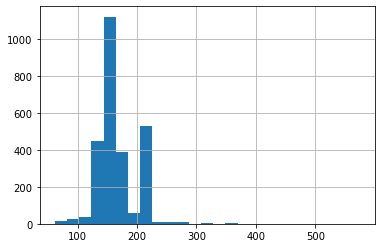

In [137]:
# length of the tweets
tweet_length = [len(i) for i in df_text['tweet_text']]
pd.Series(tweet_length).hist(bins = 25)

Data Cleaning

In [138]:
# Remove special characters from tweet text

df_text.tweet_text = df_text.tweet_text.str.replace('[@,#,&]', '')

# Remove twitter handler

df_text.tweet_text = df_text.tweet_text.str.replace('@[^\s]+', '')

#Remove digits
df_text.tweet_text = df_text.tweet_text.str.replace(' \d+ ','')

# remove multiple spaces with single space
df_text.tweet_text = df_text.tweet_text.str.replace("http\S+", "")
# remove multiple spaces with single space
df_text.tweet_text = df_text.tweet_text.str.replace('\s+', ' ')
#remove all single characters
df_text.tweet_text = df_text.tweet_text.str.replace(r'\s+[a-zA-Z]\s+', '')

df_text.tweet_text = df_text.tweet_text.str.replace("b'RT", '')
df_text.tweet_text = df_text.tweet_text.str.replace("b'", '')
df_text.tweet_text = df_text.tweet_text.str.replace('b', '')


<ipython-input-138-34503bd19eb5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text.tweet_text = df_text.tweet_text.str.replace('[@,#,&]', '')
<ipython-input-138-34503bd19eb5>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text.tweet_text = df_text.tweet_text.str.replace('@[^\s]+', '')
<ipython-input-138-34503bd19eb5>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text.tweet_text = df_text.tweet_text.str.replace(' \d+ ','')
<ipython-input-138-34503bd19eb5>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text.tweet_text = df_text.tweet_text.str.replace("http\S+", "")
<ipython-input-138-34503bd19eb5>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text.tweet_text = df_text.tweet_text.str.replace('\s+', ' ')
<ipython

In [133]:
#import ast
#df_text['tweet_text'] = df_text['tweet_text'].apply(ast.literal_eval).str.decode("utf-8")

#df_text1= df_text.tweet_text[1].str.decode("utf-8-sig")
#df_text['tweet_text'] = df_text['tweet_text'].str.decode('utf-8-sig')
#df_text['tweet_text'] = df_text['tweet_text'].bytes.decode(encoding='utf-8-sig', errors='strict')

AttributeError: 'numpy.float64' object has no attribute 'str'

In [144]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smhatr6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smhatr6\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [140]:
pd.set_option('display.max_columns', 1100)
pd.set_option('display.max_rows', 1100)

In [141]:
#df_text['tweet_text']
df_text.head()

,timestamp,tweet_text,username,all_hashtags,location,followers_count,retweet_count,favorite_count
0,2022-03-06 19:38:15+00:00,Spread info RETWEET not just LIKE Ukraine Russ...,b'UkraineInImages',"['Ukraine', 'Russia', 'UkraineRussiaWar']",NaN,17,0,0
1,2022-03-06 19:38:14+00:00,"""It is reported thatrussian fighter has just e...",b'RealestWar',[],Lithuania,226,0,0
2,2022-03-06 19:38:14+00:00,UkraineNewsUK: In Kyivwoman knocked downRussi...,b'0Plongstocking2',[],NaN,2493,628,0
3,2022-03-06 19:38:13+00:00,Militarylandnet: \xf0\x9f\x93\x7 Russian BMP-...,b'InfelizChino',"['Ukraine', 'UkraineRussiaWar']",NaN,431,34,0
4,2022-03-06 19:38:13+00:00,IndyMan2020: Ukraine has flooded the northern...,b'GravelBot',"['rasputitsa', 'kyiv', 'ukraine', 'war']",Eating Bytes of Gravel,693,1,0


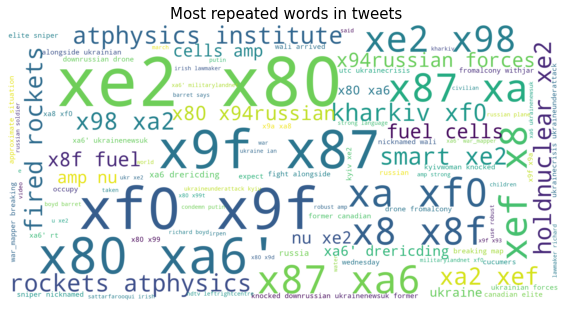

In [142]:
# Get stopwords
# Define nltk stopwords in english
stop_words = stopwords.words('english')
stop_words.extend(['ha', 'wa', '-'])

# Get a string of tweets 
tweet_text = ",".join(review.lower() for review in df_text.tweet_text if 'UkraineRussiaWar' not in review)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(tweet_text)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most repeated words in tweets',fontsize=15)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ukraine'),
  Text(1, 0, 'ukrainerussiawar'),
  Text(2, 0, '\\xf0\\x9f\\x87\\xa\\xf0\\x9f\\x87\\xa6'),
  Text(3, 0, 'force'),
  Text(4, 0, 'kharkiv'),
  Text(5, 0, 'russia'),
  Text(6, 0, 'fired'),
  Text(7, 0, 'institute'),
  Text(8, 0, 'rocket'),
  Text(9, 0, 'atphysics')])

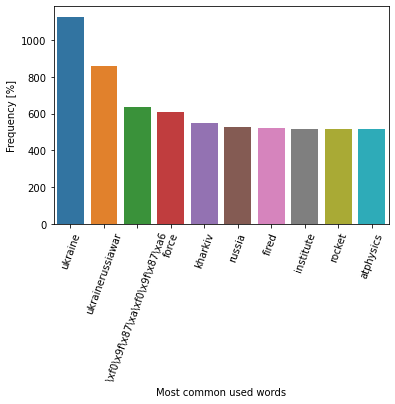

In [145]:
# lemmatize text column by using a lemmatize function
def lemmatize_text(tweet_text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(tweet_text.lower())]


# Initialize the Lemmatizer and Whitespace Tokenizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Lemmatize words
df_text['lemmatized'] = df_text.tweet_text.apply(lemmatize_text)
df_text['lemmatized'] = df_text['lemmatized'].apply(lambda x: [word for word in x if word not in stop_words])

# use explode to expand the lists into separate rows
wf_tweets = df_text.lemmatized.explode().to_frame().reset_index(drop=True)

# plot dfe
sns.countplot(x='lemmatized', data=wf_tweets, order=wf_tweets.lemmatized.value_counts().iloc[:10].index)
plt.xlabel('Most common used words')
plt.ylabel('Frequency [%]')
plt.xticks(rotation=70)

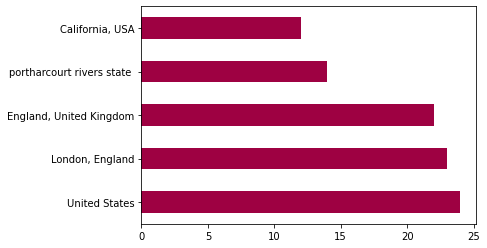

In [147]:
# Get countries which post more tweets
cmap = cm.get_cmap('Spectral') 

countries=df_text['location'].value_counts().sort_values(ascending=False)[:5].plot(
    kind = 'barh', 
    cmap=cmap, 
    edgecolor='None')

Sentiment Analysis using Textblob

In [149]:
df_text['polarity'] = df_text.tweet_text.apply(lambda x: TextBlob(x).polarity)
df_text['subjectivity'] = df_text.tweet_text.apply(lambda x: TextBlob(x).subjectivity)

df_text.head(10)

,timestamp,tweet_text,username,all_hashtags,location,followers_count,retweet_count,favorite_count,lemmatized,polarity,subjectivity
0,2022-03-06 19:38:15+00:00,Spread info RETWEET not just LIKE Ukraine Russ...,b'UkraineInImages',"['Ukraine', 'Russia', 'UkraineRussiaWar']",NaN,17,0,0,"[spread, info, retweet, like, ukraine, russia,...",0.000000,0.000000
1,2022-03-06 19:38:14+00:00,"""It is reported thatrussian fighter has just e...",b'RealestWar',[],Lithuania,226,0,0,"[""it, reported, thatrussian, fighter, een, des...",0.100000,0.400000
2,2022-03-06 19:38:14+00:00,UkraineNewsUK: In Kyivwoman knocked downRussi...,b'0Plongstocking2',[],NaN,2493,628,0,"[ukrainenewsuk:, kyivwoman, knocked, downrussi...",0.000000,0.000000
3,2022-03-06 19:38:13+00:00,Militarylandnet: \xf0\x9f\x93\x7 Russian BMP-...,b'InfelizChino',"['Ukraine', 'UkraineRussiaWar']",NaN,431,34,0,"[militarylandnet:, \xf0\x9f\x93\x7, russian, b...",-0.050000,0.300000
4,2022-03-06 19:38:13+00:00,IndyMan2020: Ukraine has flooded the northern...,b'GravelBot',"['rasputitsa', 'kyiv', 'ukraine', 'war']",Eating Bytes of Gravel,693,1,0,"[indyman2020:, ukraine, flooded, northern, par...",0.133929,0.321429
5,2022-03-06 19:38:13+00:00,DrEricDing: Not smart\xe2\x80\x94Russian forc...,b'sherry_bath',[],"California, USA",10089,675,0,"[drericding:, smart\xe2\x80\x94russian, force,...",0.000000,0.000000
6,2022-03-06 19:38:12+00:00,AfricaUnitNow: Yes this is Moscow. Like and r...,b'F1Ulf',"['Ukraine', 'Russia', 'UkraineRussiaWar']",NaN,8,546,0,"[africaunitnow:, yes, moscow., like, retweet, ...",0.000000,0.000000
7,2022-03-06 19:38:11+00:00,KyivPost: TikTok has stopped its work in Russ...,b'Claudio_Forzano',['UkraineRussiaWar'],Catania,2822,12,0,"[kyivpost:, tiktok, stopped, work, russia, eca...",0.000000,0.000000
8,2022-03-06 19:38:11+00:00,KyivPost:000 volunteers fromcountries all ove...,b'beaudyk',['UkraineRussiaWar'],Las Vegas,4241,202,0,"[kyivpost:000, volunteer, fromcountries, world...",0.000000,0.000000
9,2022-03-06 19:38:10+00:00,KyivPost: TikTok has stopped its work in Russ...,b'GaiaPanMa',['UkraineRussiaWar'],The World,429,12,0,"[kyivpost:, tiktok, stopped, work, russia, eca...",0.000000,0.000000


In [153]:
df_text['sentiment'] = np.where(df_text.polarity > 0, 'positive', np.where(df_text.polarity < 0, 'negative', 'neutral'))
df_text.head()

,timestamp,tweet_text,username,all_hashtags,location,followers_count,retweet_count,favorite_count,lemmatized,polarity,subjectivity,sentiment
0,2022-03-06 19:38:15+00:00,Spread info RETWEET not just LIKE Ukraine Russ...,b'UkraineInImages',"['Ukraine', 'Russia', 'UkraineRussiaWar']",NaN,17,0,0,"[spread, info, retweet, like, ukraine, russia,...",0.000000,0.000000,neutral
1,2022-03-06 19:38:14+00:00,"""It is reported thatrussian fighter has just e...",b'RealestWar',[],Lithuania,226,0,0,"[""it, reported, thatrussian, fighter, een, des...",0.100000,0.400000,positive
2,2022-03-06 19:38:14+00:00,UkraineNewsUK: In Kyivwoman knocked downRussi...,b'0Plongstocking2',[],NaN,2493,628,0,"[ukrainenewsuk:, kyivwoman, knocked, downrussi...",0.000000,0.000000,neutral
3,2022-03-06 19:38:13+00:00,Militarylandnet: \xf0\x9f\x93\x7 Russian BMP-...,b'InfelizChino',"['Ukraine', 'UkraineRussiaWar']",NaN,431,34,0,"[militarylandnet:, \xf0\x9f\x93\x7, russian, b...",-0.050000,0.300000,negative
4,2022-03-06 19:38:13+00:00,IndyMan2020: Ukraine has flooded the northern...,b'GravelBot',"['rasputitsa', 'kyiv', 'ukraine', 'war']",Eating Bytes of Gravel,693,1,0,"[indyman2020:, ukraine, flooded, northern, par...",0.133929,0.321429,positive


In [154]:
# Shows the top 5 tweets with highest polarity scores
df_text.nlargest(5,'polarity')['tweet_text']

147     Safeukraine1: $SFU token has continued her im...
323     Safeukraine1: $SFU token has continued her im...
334     W_W_3_2022: Brave Moscow citizens onprotest "...
343     Safeukraine1: $SFU token has continued her im...
596     W_W_3_2022: Brave Moscow citizens onprotest "...
Name: tweet_text, dtype: object

In [155]:
# Shows the top 5 tweets with highest polarity and subjectivity scores
df_text.nlargest(5, ['polarity', 'subjectivity'])['tweet_text']

147     Safeukraine1: $SFU token has continued her im...
323     Safeukraine1: $SFU token has continued her im...
334     W_W_3_2022: Brave Moscow citizens onprotest "...
343     Safeukraine1: $SFU token has continued her im...
596     W_W_3_2022: Brave Moscow citizens onprotest "...
Name: tweet_text, dtype: object

In [156]:
# Shows the top 5 tweets with lowest polarity scores
df_text.nsmallest(5,'polarity')['tweet_text']

1643    \xf0\x9f\x9a\xa8Out of the frying pan into the...
2029    "FUNDRAISER FOR UKRAINE ARMY! Putin's Evil WAR...
2130    nexta_tv This is so painful! UkraineRussiaWar ...
152      luizlemuz: MarcoRules is the Nikki Haley of M...
460     MarcoRules is the Nikki Haley of Mark Meadows ...
Name: tweet_text, dtype: object

In [157]:
# Shows the top 5 tweets with lowest polarity and subjectivity scores
df_text.nsmallest(5, ['polarity', 'subjectivity'])['tweet_text']

1643    \xf0\x9f\x9a\xa8Out of the frying pan into the...
2029    "FUNDRAISER FOR UKRAINE ARMY! Putin's Evil WAR...
2130    nexta_tv This is so painful! UkraineRussiaWar ...
152      luizlemuz: MarcoRules is the Nikki Haley of M...
460     MarcoRules is the Nikki Haley of Mark Meadows ...
Name: tweet_text, dtype: object

Exploratory Data Analysis

In [158]:
df_text['sentiment'].value_counts()

neutral     2040
positive     438
negative     187
Name: sentiment, dtype: int64

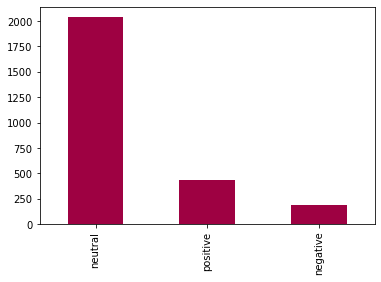

In [159]:
cmap = cm.get_cmap('Spectral') 

countries=df_text['sentiment'].value_counts().sort_values(ascending=False)[:5].plot(
    kind = 'bar', 
    cmap=cmap, 
    edgecolor='None')